Importando as Bibliotecas que serão utilizadas no Projeto 1

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

Carregando as duas imagens que serão utilizadas no Projeto

In [9]:
img_fundo_verde = cv2.imread('img_fundo_verde_1.jpg')
imagem_fundo = cv2.imread('background_1.png')

Converter as imagens de BGR para RGB 

(np.float64(-0.5), np.float64(799.5), np.float64(449.5), np.float64(-0.5))

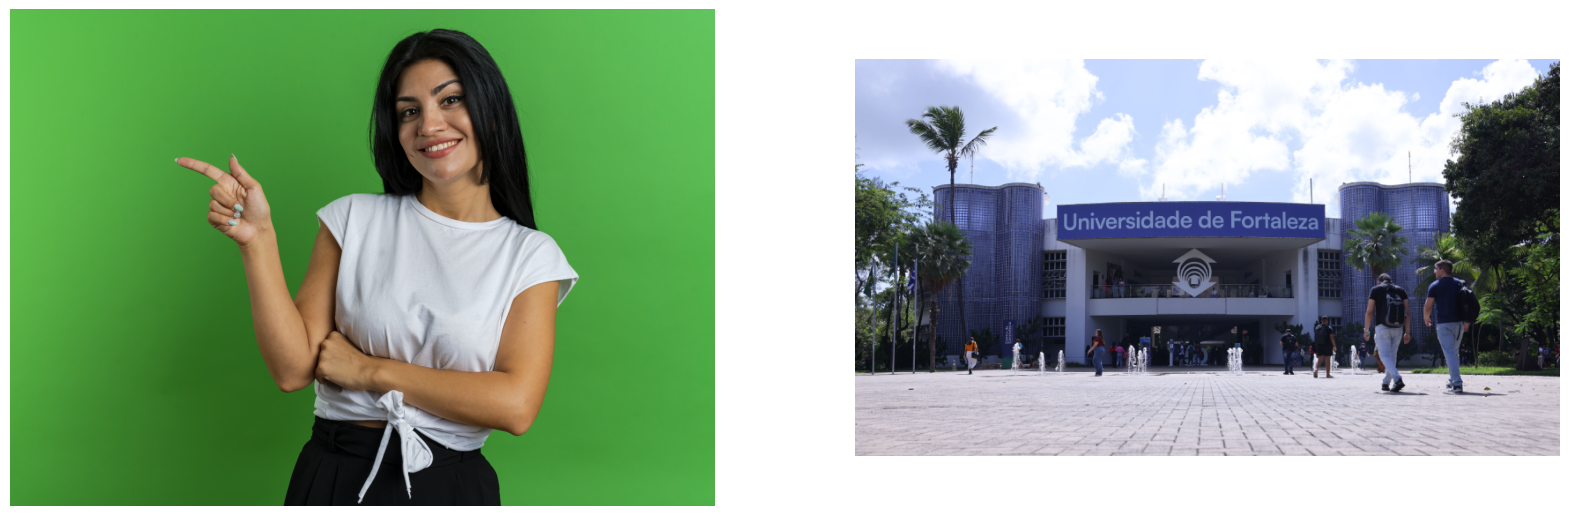

In [16]:
fundo_verde_rgb = cv2.cvtColor(img_fundo_verde, cv2.COLOR_BGR2RGB)
imagem_fundo_rgb = cv2.cvtColor(imagem_fundo, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.imshow(fundo_verde_rgb)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(imagem_fundo_rgb)
plt.axis('off')


Converter RGB para HSV para separar as cores na imagem com fundo verde

In [17]:
imagem_decomposta = cv2.cvtColor(fundo_verde_rgb, cv2.COLOR_RGB2HSV)

Utilizar máscara para destacar a parte verde da imagem, facilitando a remoção.

In [19]:
lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])
mascara_verde = cv2.inRange(imagem_decomposta, lower_green, upper_green)
parte_verde = cv2.bitwise_and(fundo_verde_rgb, fundo_verde_rgb, mask=mascara_verde)

(np.float64(-0.5), np.float64(7520.5), np.float64(5303.5), np.float64(-0.5))

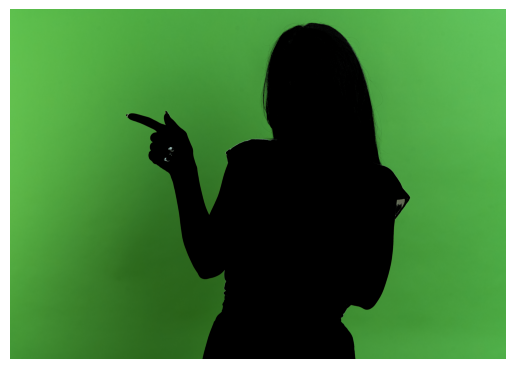

In [22]:
plt.imshow(parte_verde)
plt.axis('off')

Utilizar a máscara invertida

(np.float64(-0.5), np.float64(7520.5), np.float64(5303.5), np.float64(-0.5))

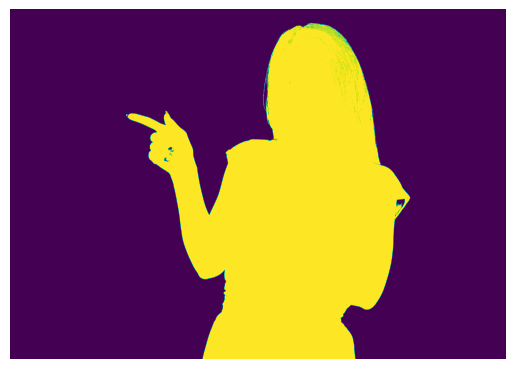

In [24]:
mascara_invertida = cv2.bitwise_not(mascara_verde)
plt.imshow(mascara_invertida)
plt.axis('off') 

(np.float64(-0.5), np.float64(7520.5), np.float64(5303.5), np.float64(-0.5))

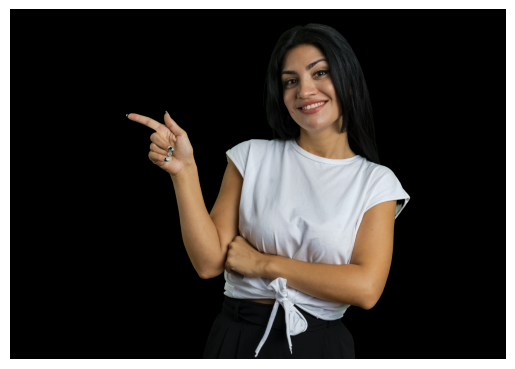

In [26]:
imagem_sem_verde = cv2.bitwise_and(fundo_verde_rgb, fundo_verde_rgb, mask=mascara_invertida)
plt.imshow(imagem_sem_verde)
plt.axis('off')

Redimensionar o fundo

(np.float64(-0.5), np.float64(7520.5), np.float64(5303.5), np.float64(-0.5))

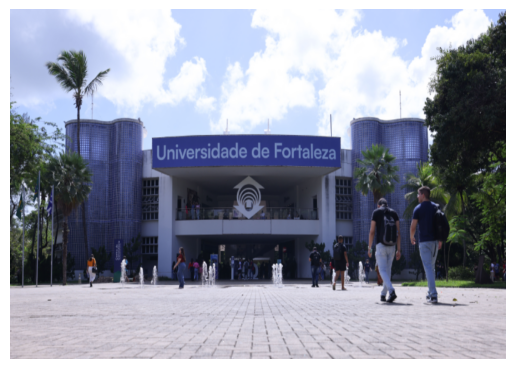

In [29]:
background = cv2.resize(imagem_fundo_rgb, (fundo_verde_rgb.shape[1], fundo_verde_rgb.shape[0]))
plt.imshow(background)
plt.axis('off')

Aplicando máscara ao fundo

(np.float64(-0.5), np.float64(7520.5), np.float64(5303.5), np.float64(-0.5))

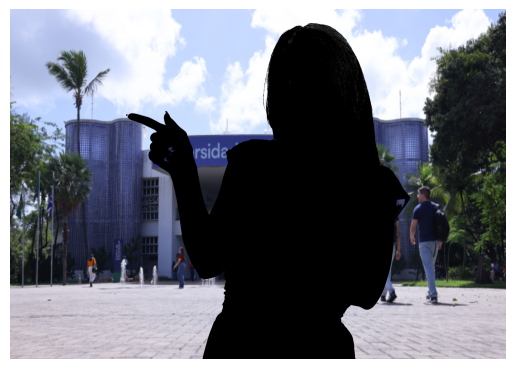

In [33]:
imagem_apenas_fundo = cv2.bitwise_and(background, background, mask=mascara_verde)
plt.imshow(imagem_apenas_fundo)
plt.axis('off')

Combinar as imagens 

(np.float64(-0.5), np.float64(7520.5), np.float64(5303.5), np.float64(-0.5))

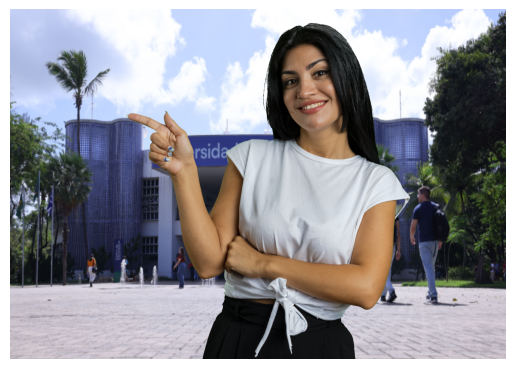

In [36]:
imagem_resultante = cv2.add(imagem_sem_verde, imagem_apenas_fundo)
plt.imshow(imagem_resultante)
plt.axis('off')